In [198]:
import pandas as pd
import numpy as np

In [199]:
col_lst = ['age','workclass','fnlwgt','education','education_num',
           'marital_status','occupation','relationship','race','sex',
          'capital_gain','capital_loss','hours_per_week','native_country','salary']

In [200]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [201]:
data.columns=col_lst

In [202]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2 Data Preparation

In [203]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [205]:
cat_cols  = [col for col in col_lst if data[col].dtypes =='object']

In [206]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [207]:
for col in cat_cols: 
    print ('Column Name: ', col)
    print ('\n')
    print (data[col].value_counts())
    print ('\n====================')

Column Name:  workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Column Name:  education


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Column Name:  marital_status


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status

In [208]:
y = data['salary'].copy()

In [209]:
X = data[[col for col in data.columns if col != 'salary']].copy()
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
y_train.value_counts()

 <=50K    17303
 >50K      5489
Name: salary, dtype: int64

# Baseline Accuracy 

In [211]:
y_train.value_counts()[0]/(y_train.value_counts()[0] + y_train.value_counts()[1])

0.75916988416988418

In [212]:
y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])

0.24083011583011582

In [213]:
categorical_df = X_train.select_dtypes(include=[object])

In [214]:
categorical_df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
29498,Private,HS-grad,Never-married,Adm-clerical,Unmarried,White,Female,United-States
14082,Local-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
32391,Private,HS-grad,Separated,Protective-serv,Not-in-family,White,Male,United-States
20304,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
16590,Private,Assoc-acdm,Divorced,Adm-clerical,Not-in-family,Black,Male,United-States


In [215]:
numeric_df = X_train.select_dtypes(exclude=[object])
numeric_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
29498,21,33831,9,0,0,40
14082,26,242464,9,3103,0,40
32391,55,199763,9,0,0,81
20304,33,303867,10,0,0,50
16590,34,182401,12,0,0,40


Check the numeric dataframe for missing values

In [216]:
categorical_df_nan = categorical_df.copy()
categorical_df_nan.replace(' ?',np.nan,inplace=True)
categorical_df['occupation'].value_counts()

 Prof-specialty       2921
 Craft-repair         2897
 Exec-managerial      2867
 Adm-clerical         2607
 Sales                2575
 Other-service        2278
 Machine-op-inspct    1379
 ?                    1300
 Transport-moving     1109
 Handlers-cleaners     964
 Farming-fishing       685
 Tech-support          646
 Protective-serv       452
 Priv-house-serv       107
 Armed-Forces            5
Name: occupation, dtype: int64

In [217]:
# Looks like there are some leading or trailing spaces with the ? 

In [218]:
categorical_df.isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [219]:
'''Pernesso Genius Code! '''

def cat_imputer(df):
    # must be a pandas df
    for col in df.columns:
        df[col].fillna(value=df[col].mode()[0], inplace=True)
    return df

In [220]:
new_cat_df = cat_imputer(categorical_df_nan)
new_cat_df.isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

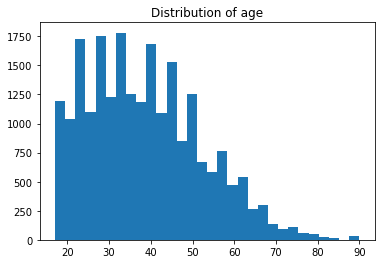

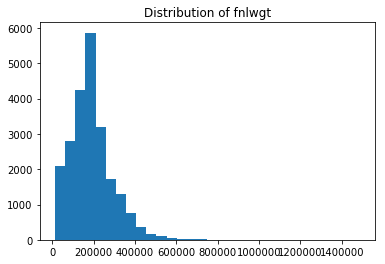

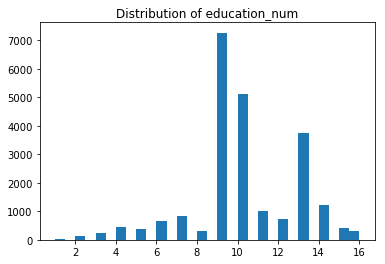

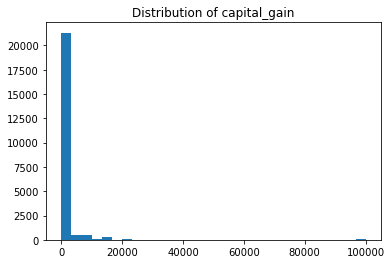

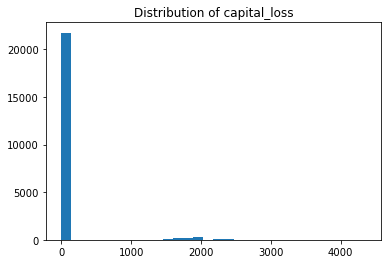

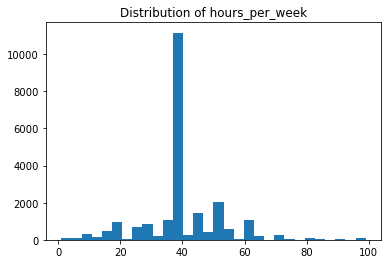

In [221]:
import matplotlib.pyplot as plt
for col in numeric_df.columns: 
    plt.hist(numeric_df[col].values, bins=30)
    plt.title('Distribution of {}'.format(col))
    plt.show()

The numeric_df looks to have missing values and we now have as sense of distributions. We can go ahead and standardize those values

In [222]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numeric_df_ss = pd.DataFrame(ss.fit_transform(numeric_df), index = numeric_df.index, columns= numeric_df.columns)

In [223]:
numeric_df_ss.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
29498,-1.284503,-1.473385,-0.419425,-0.147646,-0.215338,-0.036190
14082,-0.918796,0.496523,-0.419425,0.271484,-0.215338,-0.036190
32391,1.202305,0.093342,-0.419425,-0.147646,-0.215338,3.269266
20304,-0.406806,1.076289,-0.031457,-0.147646,-0.215338,0.770019
16590,-0.333664,-0.070590,0.744480,-0.147646,-0.215338,-0.036190


Before making dummy variables, lets aggregate the small classes together in the 'Native-Country' column

In [224]:
new_cat_df['native_country'] = [1 if 'United-States' in country else 0 for country in new_cat_df['native_country']]

In [226]:
new_cat_df.native_country.value_counts()

1    20835
0     1957
Name: native_country, dtype: int64

In [227]:
for col in new_cat_df.columns:
    print('class distribution for {}'.format(col), '\n')
    print(new_cat_df[col].value_counts(), '\n----------------------------\n')

class distribution for workclass 

 Private             17187
 Self-emp-not-inc     1763
 Local-gov            1453
 State-gov             920
 Self-emp-inc          795
 Federal-gov           660
 Without-pay            10
 Never-worked            4
Name: workclass, dtype: int64 
----------------------------

class distribution for education 

 HS-grad         7262
 Some-college    5128
 Bachelors       3759
 Masters         1205
 Assoc-voc        994
 11th             845
 Assoc-acdm       742
 10th             649
 7th-8th          447
 Prof-school      399
 9th              377
 12th             303
 Doctorate        293
 5th-6th          233
 1st-4th          121
 Preschool         35
Name: education, dtype: int64 
----------------------------

class distribution for marital_status 

 Married-civ-spouse       10510
 Never-married             7458
 Divorced                  3119
 Separated                  712
 Widowed                    664
 Married-spouse-absent      311
 Married

In [230]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [231]:
cat_encoder = CategoricalEncoder(encoding='onehot-dense',handle_unknown='ignore')
cat_df_reshaped = new_cat_df.values.reshape(-1, 1)
cat_df_onehot = cat_encoder.fit_transform(cat_df_reshaped)
cat_df_onehot

TypeError: '>' not supported between instances of 'str' and 'int'